In [78]:
import xarray as xr
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.style.use('ggplot')

## Open the dataset 

In [4]:
path = 'martini800_N1_p_sample.nc'
ds = xr.open_dataset(path)

In [5]:
ds

<xarray.Dataset>
Dimensions:     (eta_rho: 426, ocean_time: 1, s_rho: 1, xi_rho: 480)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2017-01-01T12:00:00
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
  * s_rho       (s_rho) float64 -0.0119
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    N1_p        (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
Attributes: (12/43)
    CDI:               Climate Data Interface version 1.9.3 (http://mpimet.mp...
    history:           Fri Feb 12 13:47:45 2021: cdo selvar,N1_p martini800_s...
    Conventions:       CF-1.4, SGRID-0.3
    file:              martini800_avg_00001.nc
    format:            netCDF-4/HDF5 file
    type:              ROMS/TOMS nonlinear model averages file
    ...                ...
    tiling:            016x032
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_st...
    CPP_options:       MARTINI800BGC, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_B...
    bio_file:          ROMS/Nonlinear/Biology/rfabm.h
    NCO:               4.7.2
    CDO:               Climate Data Operators version 1.9.3 (http://mpimet.mp...

### Check the time coordinate

In [30]:
ds.ocean_time.values

array(['2017-01-01T12:00:00.000000000'], dtype='datetime64[ns]')

### Since we have only one time point and have have coordinates, we can make a map without slicing 

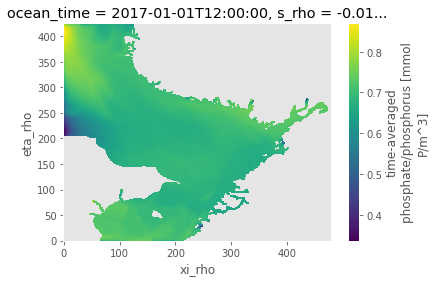

In [38]:
ds.N1_p.plot();

### Add projection and replot

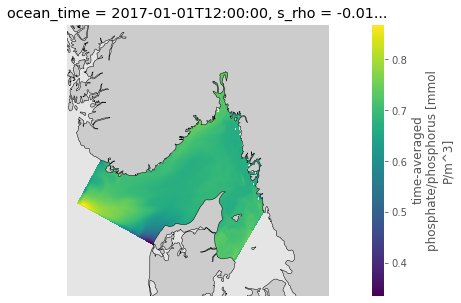

In [79]:
proj = ccrs.LambertConformal(central_longitude=10, central_latitude=20)
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(projection=proj)

ds.N1_p.isel(ocean_time = 0,s_rho = 0).plot(x='lon_rho', y='lat_rho',
                                          transform=ccrs.PlateCarree());
coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='k', facecolor='0.8')
ax.add_feature(coast_10m);

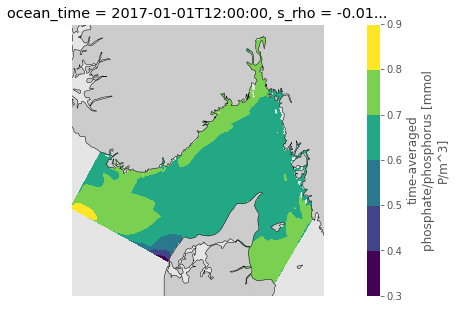

In [80]:
# Another option, less smooth
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(projection=proj)

ds.N1_p.isel(ocean_time = 0,s_rho = 0).plot.contourf(x='lon_rho', y='lat_rho',
                                          transform=ccrs.PlateCarree());
ax.add_feature(coast_10m);

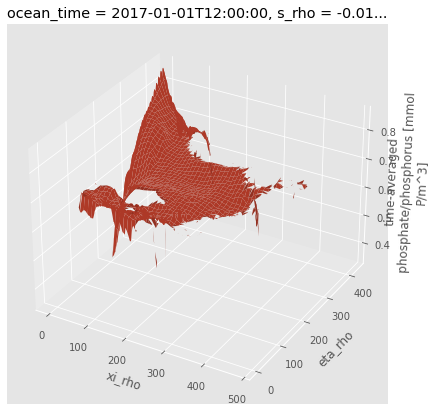

In [69]:
fig = plt.figure(figsize = (7,7))
ds_slice = ds.N1_p.isel(ocean_time = 0,s_rho = 0)
xr.plot.surface(ds_slice,figure = fig)

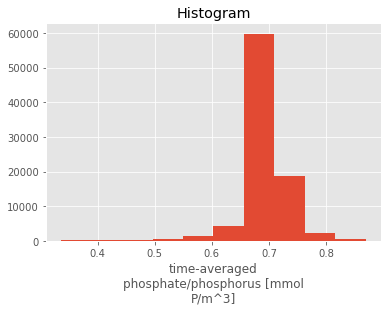

In [37]:
ds.N1_p.plot.hist();